<a href="https://colab.research.google.com/github/ddvika/Data-Science-School-2020/blob/main/Part_1_Profiling_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Занятие 2. Часть 1. Профилирование кода в Python**
#### 01.12.2020

**Преподаватель: Виктория Дочкина**

### **План занятия:**
В первой части занятия мы разберем следующее:
- кратко о магических методах
- ручное профилирование
- какие готовые инструменты существуют для профилирования
- Pandas profiling
- несколько полезных практических применений

Подобнее о сути и целях Профилирования написано в лекции сегодняшнего занятия.

Но прежде чем мы приступим к профилированию:

## Краткий экскурс по магическим методам

Магические команды делятся на два вида:

- линейные magics, которые начинаются с одного символа % и работают с одной строкой ввода;
- ячеечные magics, связанные с двойным префиксом %% и работающие с несколькими строками ввода.

Выведем список имеющихся методов:

In [29]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

### %%writefile

 %%writefile записывает содержимое ячейки в файл. Здесь код будет записан в файл с именем hello.py и сохранён в текущем каталоге.

In [30]:
%%writefile hello.py

def print_hello():
    print('Hello, friend!')

if __name__ == '__main__':
    print_hello()

Overwriting hello.py


Что за конструкция "if __name__ == '__main__':" ???!!

- Её основное назначение — разделение кода, который будет выполнятся при вызове кода как модуля (при импортировании его в другой скрипт) — и при запуске самого модуля, как отдельного файла.

Вы можете запустить программу напрямую через python:

In [31]:
!python3 hello.py

Hello, friend!


### %run

Функция %run запускает Python-скрипт внутри Notebook.

In [32]:
%run hello.py

Hello, friend!


### %timeit
позволяет измерить время исполнения одной строки


In [33]:
import numpy as np
def mult(a, b):
    for i in range(10):
        a*b

In [34]:
x = np.array([1,2,3])
y = np.array([4,5,6])

%timeit mult(x, y)

The slowest run took 5.44 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.37 µs per loop


### %timeit
позволяет измерить время исполнения блока строк

In [35]:
x = np.array([1,2,3])
y = np.array([4,5,6])

In [36]:
%%timeit
for i in range(10):
    x*y

The slowest run took 6.12 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.56 µs per loop


# Ручное профилирование

In [37]:
import time

Напишем функцию для вычисления чисел Фиббоначи

In [38]:
def fib(n):
    if n == 0:
        return 1
    if n == 1:
        return 1
    return fib(n - 1) + fib(n - 2)

А теперь при помощи метода time() посчитаем кол-во времени занимаемое для расчета 30-го числа из последовательности Фиббоначи

In [39]:
start = time.time() # включаем счетчик 

num = fib(30)

end = time.time() # выключаем счетчик

print(end - start, ' секунд')

0.35392117500305176  секунд


Задание:

Выполнить функцию N раз и посчитать СРЕДНЕЕ время выполнения по всем запускам

In [40]:
# TODO

Задание:
повторить аналогично с использованием $timeit

In [41]:
# TODO

# Профилирование с использованием готовых инструментов

**Профилирование по времени исполнения:**

Инструменты, которые мы рассмотрим:

* cProfile
* line_profiler

Другие инструменты:

* py-spy
* pstats
* RunSnakeRun
* SnakeViz

py-spy позволяет визуализировать потребление времени во время выполнения программы без модификаций её кода

## cProfile
Модуль, который позволяет собрать следующую аналитику по вызовам функций: 

- ncalls – это количество совершенных вызовов;
- tottime – это все время, потраченное в данной функции;
- percall – ссылается на коэффициент tottime, деленный на ncalls;
- cumtime – совокупное время, потраченное как в данной функции, так и наследуемых функциях. Это работает также и с рекурсивными функциями!
- Второй столбец percall – это коэффициент cumtime деленный на примитивные вызовы;
- filename:lineno(function) предоставляет соответствующие данные о каждой функции

In [56]:
%%writefile test_funcs.py

import time
import cProfile
 
def fast():
    print("Я быстрая функция")
 
 
def slow():
    time.sleep(3)
    print("Я очень медленная функция")
 
 
def medium():
    time.sleep(0.5)
    print("Я средняя функция...")
 
 
def main():
    fast()
    slow()
    medium()

if __name__ == '__main__':
    cProfile.run('main()', filename=None, sort='tottime')

Overwriting test_funcs.py


In [60]:
# TODO убрать if __name__ и запустить %prun

Сохраняем программу как ptest.py. В этом примере мы создали четыре функции. Первые три работают с разными темпами. Быстрая функция запустится с нормальной скоростью, средняя функция потратит примерно полсекунды на запуск, медленная функция потратит примерно три секунды для запуска. Главная функция вызывает остальные три. Давайте запустим cProfile

In [57]:
!python3 test_funcs.py

Я быстрая функция
Я очень медленная функция
Я средняя функция...
         12 function calls in 3.504 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    3.504    1.752    3.504    1.752 {built-in method time.sleep}
        3    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        1    0.000    0.000    3.504    3.504 {built-in method builtins.exec}
        1    0.000    0.000    0.501    0.501 test_funcs.py:14(medium)
        1    0.000    0.000    3.003    3.003 test_funcs.py:9(slow)
        1    0.000    0.000    3.504    3.504 test_funcs.py:19(main)
        1    0.000    0.000    3.504    3.504 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 test_funcs.py:5(fast)




- ncalls – это количество совершенных вызовов;
- tottime – это все время, потраченное в данной функции;
- percall – ссылается на коэффициент tottime, деленный на ncalls;
- cumtime – совокупное время, потраченное как в данной функции, так и наследуемых функциях. Это работает также и с рекурсивными функциями!
- Второй столбец percall – это коэффициент cumtime деленный на примитивные вызовы;
- filename:lineno(function) предоставляет соответствующие данные о каждой функции

### %prun
магический метод %prun работает аналогично cProfile.run()

In [61]:
from test_funcs import main, fast, slow, medium

Используем магическую функцию %prun

In [62]:
%prun main()

Я быстрая функция
Я очень медленная функция
Я средняя функция...
 

### %memit
Измеряет объем памяти, необходимый данному фрагменту кода. А именно: наибольшее значение расходуемой памяти системы во время работы программы

In [63]:
!pip install memory_profiler

In [64]:
%load_ext line_profiler
%load_ext memory_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [65]:
%memit main()

Я быстрая функция
Я очень медленная функция
Я средняя функция...
peak memory: 158.33 MiB, increment: 0.00 MiB


peak memory - наибольшее значение расходуемой памяти системы во время работы программы. Нужно, чтобы посмотреть, насколько мы близки к тому, чтобы израсходовать всю RAM.
increment = peak memory - starting memory

In [66]:
%memit?

Следующий пример. 

Давайте оценим время загрузки следующих сайтов: Facebook, Google, Twitter, VK.

In [67]:
%%writefile site_speed_test.py
import requests
import cProfile

 
def facebook():
    requests.get('https://facebook.com')
 
 
def google():
    requests.get('https://google.com')
	
	
def twitter():
    requests.get('https://twitter.com')
	
	
def vk():
    requests.get('https://vk.com')
 
 
def main():
    facebook()
    google()
    twitter()
    vk()

cProfile.run('main()', filename=None, sort='tottime')

Overwriting site_speed_test.py


In [68]:
!python3 site_speed_test.py

         78675 function calls (78301 primitive calls) in 1.558 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       53    0.639    0.012    0.639    0.012 {method 'read' of '_ssl._SSLSocket' objects}
        7    0.331    0.047    0.331    0.047 {method 'do_handshake' of '_ssl._SSLSocket' objects}
        7    0.304    0.043    0.304    0.043 {method 'connect' of '_socket.socket' objects}
        7    0.164    0.023    0.164    0.023 {built-in method _socket.getaddrinfo}
        7    0.043    0.006    0.043    0.006 {method 'load_verify_locations' of '_ssl._SSLContext' objects}
        7    0.006    0.001    0.008    0.001 connectionpool.py:407(close)
     2704    0.003    0.000    0.008    0.000 enum.py:803(__and__)
     5985    0.003    0.000    0.003    0.000 enum.py:517(__new__)
     5985    0.002    0.000    0.005    0.000 enum.py:267(__call__)
   143/72    0.002    0.000    0.009    0.000 sre_compile.py:64(_compile)

# Pandas Profiling
Очень полезный инструмент для профилирования табличных данных типа Dataframe

Будем использовать датасет "Credit-g"

Описание датасета по ссылке: https://datahub.io/machine-learning/credit-g#readme

Этот набор данных классифицирует людей по их кредитной способности

In [69]:
import pandas as pd

url="https://datahub.io/machine-learning/credit-g/r/credit-g.csv"
df=pd.read_csv(url) # скачаем датасет по ссылке

In [70]:
df.head()

checking_status  duration  ... foreign_worker class
0              <0         6  ...            yes  good
1        0<=X<200        48  ...            yes   bad
2     no checking        12  ...            yes  good
3              <0        42  ...            yes  good
4              <0        24  ...            yes   bad

[5 rows x 21 columns]

In [71]:
print(df.shape)

(1000, 21)


In [72]:
#Проверим тип данных во всех колонках и. наличие NaN значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [73]:
# Выведем основные статичтические характеристики датасета по каждому из параметров
df.describe()

duration  credit_amount  ...  existing_credits  num_dependents
count  1000.000000    1000.000000  ...       1000.000000     1000.000000
mean     20.903000    3271.258000  ...          1.407000        1.155000
std      12.058814    2822.736876  ...          0.577654        0.362086
min       4.000000     250.000000  ...          1.000000        1.000000
25%      12.000000    1365.500000  ...          1.000000        1.000000
50%      18.000000    2319.500000  ...          1.000000        1.000000
75%      24.000000    3972.250000  ...          2.000000        1.000000
max      72.000000   18424.000000  ...          4.000000        2.000000

[8 rows x 7 columns]

In [74]:
# Установим специальный пакет, предназначенный для профилирования Pandas Dataframe'ов
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension #устанавливаем последнюю версию
# Для Desctop версии: !pip install pandas-profiling
# или если у вас conda - то !conda install -c anaconda pandas-profiling

#Перезапустите ноутбук после установки!

Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.10.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [75]:
import pandas_profiling # Импортируем только что установленную библиотеку

report = df.profile_report(
    sort="None", html={"style": {"full_width": True}}, progress_bar=True
)
report

Сохраним результат в файл с расширением .html

In [77]:
report.to_file("example.html")

#### Cuffliks
Библиотека Cufflinks связывает силу plotly с гибкостью pandas для лёгкого построения графиков. Теперь посмотрим, как установить библиотеку и заставить работать в pandas.
Подробнее:
https://plot.ly/python/ipython-notebook-tutorial/

In [ ]:
!pip install plotly # Plotly – обязательное условие перед установкой cufflinks
!pip install cufflinks

In [19]:
# импорт Pandas 
import pandas as pd
# импорт plotly и cufflinks в автономном режиме
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [22]:
import plotly.io as pio
pio.renderers.default = 'colab'

Давайте рассмотрим пример исследования набора данных на примере данных о пассажирах Титаника.

Набор данных содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка наборов данных содержит следующие поля:

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

* Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [38]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv # Скачаем датасет

--2020-12-01 00:37:08--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2020-12-01 00:37:08 (311 KB/s) - ‘titanic.csv’ saved [44225/44225]



In [39]:
df = pd.read_csv('titanic.csv', sep=',', header='infer')

In [40]:
df.head()

Survived  Pclass  ... Parents/Children Aboard     Fare
0         0       3  ...                       0   7.2500
1         1       1  ...                       0  71.2833
2         1       3  ...                       0   7.9250
3         1       1  ...                       0  53.1000
4         0       3  ...                       0   8.0500

[5 rows x 8 columns]

In [48]:
 df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [45]:
df['Survived'].head() # можно выбрать один столбец, выведет Series

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

По аналогии с Series можно накладывать условия на данные

In [46]:
df[df['Age'] > 70][df['Pclass'] == 1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Survived  Pclass  ... Parents/Children Aboard     Fare
95          0       1  ...                       0  34.6542
490         0       1  ...                       0  49.5042
627         1       1  ...                       0  30.0000

[3 rows x 8 columns]

In [41]:
df.iplot()

In [59]:
df['Age'].iplot()

In [65]:
df['Age'].iplot(kind='hist') #kind = "bar"

Сравнение с втроенным методом plot()

In [68]:
import matplotlib.pyplot as plt

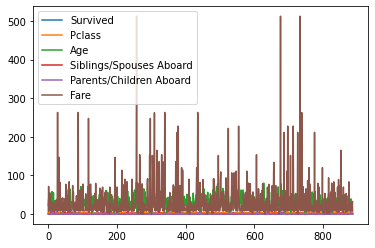

In [42]:
df.plot()

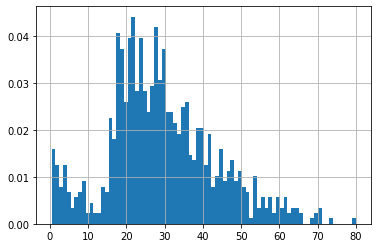

In [49]:
df['Age'].hist(density=True, bins=80) # density=True выведет долю, а не количество

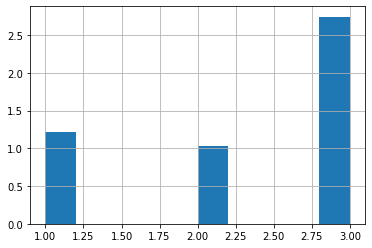

In [50]:
df['Pclass'].hist(density=True)
plt.show()

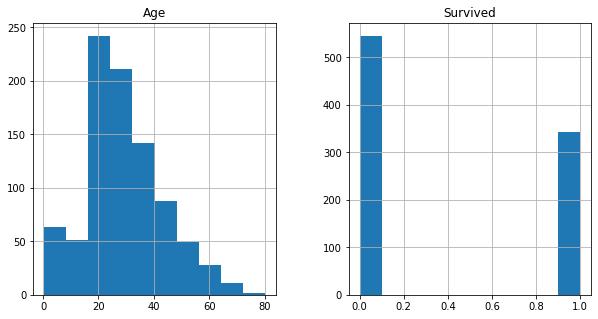

In [67]:
df[['Age', 'Survived']].hist(figsize = (10,5))
plt.show()